In [3]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

import pydot
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [89]:
X_train = pd.read_csv('mul_5_X.csv', delimiter = ',')
Y_train = pd.read_csv('mul_5_Y.csv', delimiter = ',')

In [90]:
X_train = X_train.iloc[:,1:]
Y_train = Y_train.iloc[:,1]
Y_train = pd.factorize(Y_train)[0]

In [97]:
X_train = StandardScaler().fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X_train , Y_train, test_size=0.1, random_state=42)

In [99]:
x_train.shape, y_train.shape

((591792, 48), (591792,))

In [88]:
x_test.shape

(65755, 48)

In [15]:
structure = pd.read_csv('structure.csv', delimiter = ',', header=0)

In [100]:
model1 = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf1 = model1.fit(x_train,y_train)

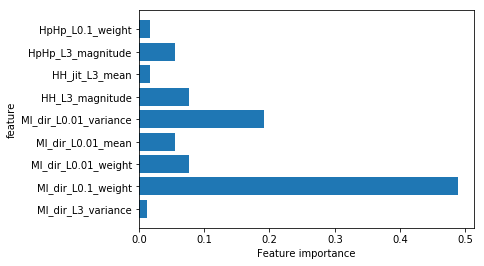

In [101]:
plot_feature_importances2(model1)

In [86]:
model_test_acc(clf1)

Accuracy: 0.91
[[5957    0    0    0    0    0    0    0    0    0    0]
 [   0 5773    0    0    0    0    0    0    0    0    0]
 [   0    0 5982    0    0    0    0    0    0    0    0]
 [   0    0    0 5989    0    0    0    0    0    0    0]
 [   0    0    0    0 5942    0    0    0    0    0    0]
 [   0    0    0    0    0 6009    0    0    0    0    0]
 [   0    0    0    0    0    0 6080    0    0    0    0]
 [   0    0    0    0    0    0    0    0 6099    0    0]
 [   0    0    0    0    0    0    0    0 5979    0    0]
 [   0    0    0    0    0    0    0    0    0 5876    0]
 [   0    0    0    0    0    0    0    0    0    0 6069]]


In [ ]:
mul_tree_graph(clf1,struct1,"bi_1.png")

In [140]:
model2 = DecisionTreeClassifier(random_state=0, criterion='gini')
clf2 = model2.fit(x_train,y_train)

In [141]:
model_test_acc(clf2)

Accuracy: 0.91
[[3038    0    0    0    0    0    0    0    0    0    0]
 [   0 2964    0    0    0    1    0    0    0    0    0]
 [   0    1 2962    1    0    0    0    0    0    0    0]
 [   0    0    0 2980    0    0    0    0    0    0    0]
 [   0    0    0    0 3034    0    0    0    0    0    0]
 [   0    0    0    0    0 3033    0    0    0    0    0]
 [   0    0    0    0    0    0 2993    0    0    0    0]
 [   0    0    0    0    0    0    0 2894    0    0    0]
 [   0    0    0    0    0    0    0 3042    5    0    0]
 [   0    0    0    0    0    0    0    0    0 2948    1]
 [   0    0    0    0    0    0    0    0    0    0 3103]]


In [82]:
model3 = DecisionTreeClassifier(max_depth=4, random_state=0)
clf3 = model3.fit(x_train,y_train)

In [83]:
model4 = DecisionTreeClassifier(max_depth=5, random_state=0)
clf4 = model4.fit(x_train,y_train)

In [84]:
model_test_acc(clf1), model_test_acc(clf2), model_test_acc(clf3), model_test_acc(clf4)

Accuracy: 1.00
[[3034    0    0    0    0    0    0    0    0    2    2]
 [   0 2964    0    0    0    1    0    0    0    0    0]
 [   0    0 2963    1    0    0    0    0    0    0    0]
 [   0    0    1 2979    0    0    0    0    0    0    0]
 [   0    0    0    0 3034    0    0    0    0    0    0]
 [   0    0    0    0    0 3033    0    0    0    0    0]
 [   0    0    0    0    0    0 2993    0    0    0    0]
 [   0    1    0    0    0    0    0 2849   44    0    0]
 [   0    1    0    0    0    0    0    0 3045    0    1]
 [   1    0    0    0    0    0    0    0    0 2946    2]
 [   0    1    0    0    0    0    0    0    0    0 3102]]
Accuracy: 1.00
[[3038    0    0    0    0    0    0    0    0    0    0]
 [   0 2962    0    0    0    0    0    2    1    0    0]
 [   0    1 2960    3    0    0    0    0    0    0    0]
 [   0    0    2 2978    0    0    0    0    0    0    0]
 [   0    0    0    0 3034    0    0    0    0    0    0]
 [   0    0    0    0    0 3033    0    0

(None, None, None, None)

In [95]:

def plot_feature_importances1(model):
    struct=[i for i in structure.iloc[0,0:115]]
    feature_import_index = [i for i in range(0,115) if(model.feature_importances_[i]>=0.01) ]
    feature_importance = [model.feature_importances_[i] for i in feature_import_index ]
    important_struct = [struct[i] for i in feature_import_index]
    plt.barh(range(0,len(feature_importance)), feature_importance, align='center')
    plt.yticks(np.arange(len(feature_importance)), important_struct)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    #plt.ylim(-1, n_features)

def plot_feature_importances2(model):
    struct=[i for i in structure.iloc[1,0:48]]
    feature_import_index = [i for i in range(0,48) if(model.feature_importances_[i]>=0.01) ]
    feature_importance = [model.feature_importances_[i] for i in feature_import_index ]
    important_struct = [struct[i] for i in feature_import_index]
    plt.barh(range(0,len(feature_importance)), feature_importance, align='center')
    plt.yticks(np.arange(len(feature_importance)), important_struct)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    #plt.ylim(-1, n_features)


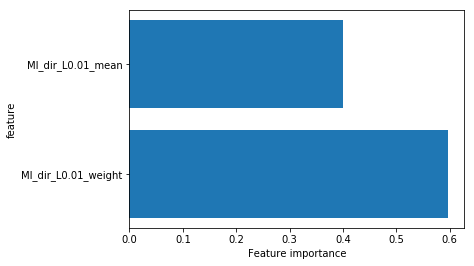

In [19]:
plot_feature_importances2(clf1) #big raw

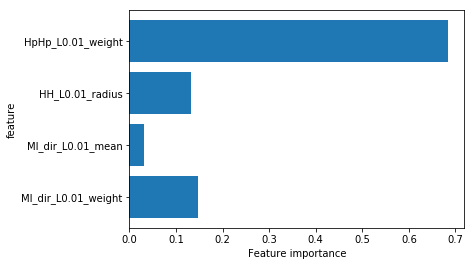

In [20]:
plot_feature_importances2(clf2) #big raw

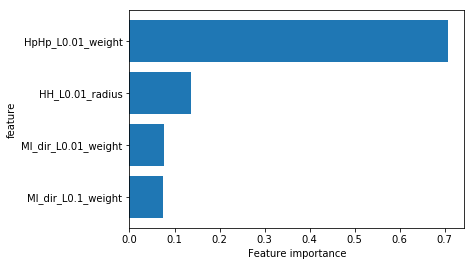

In [21]:
plot_feature_importances2(clf3) #big raw

# 트리 시각화

In [72]:
from sklearn.tree import export_graphviz

def bi_tree_graph(model,struct,name):
    export_graphviz(model, out_file="tree.dot", impurity=False, filled=True, feature_names = struct
                , class_names = ['attack','benign'])
    (graph,)= pydot.graph_from_dot_file('tree.dot',encoding='utf8')
    graph.write_png(name)
def mul_tree_graph(model,struct,name):
    export_graphviz(model, out_file="tree.dot", impurity=False, filled=True, feature_names = struct
                , class_names = ['ack','benign','combo','junk','scan1','scan2','syn','tcp','udp1','udp2','udpplain'])
    (graph,)= pydot.graph_from_dot_file('tree.dot',encoding='utf8')
    graph.write_png(name)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def model_test_acc(model):
    y_pred = model.predict(x_test)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))  


In [37]:
model_test_acc(clf1)

Accuracy: 1.00
[[59914     0]
 [    0 49525]]


In [25]:
model_test_acc(clf2)

Accuracy: 1.00
[[29945     0]
 [    0 24775]]


In [26]:
model_test_acc(clf3)

Accuracy: 0.99
[[29945     0]
 [  454 24321]]


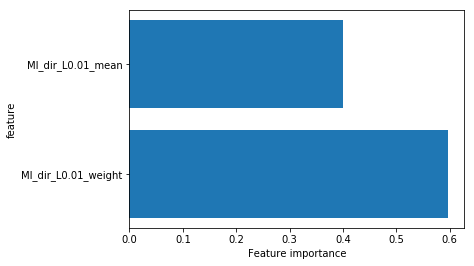

In [27]:
plot_feature_importances2(clf1)

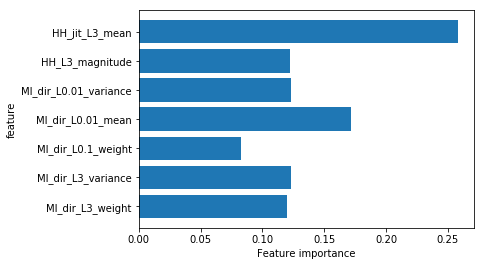

In [157]:
plot_feature_importances2(clf3)

In [16]:
struct1=[i for i in structure.iloc[0,0:115]]
struct2=[i for i in structure.iloc[1,0:48]]

In [75]:
mul_tree_graph(clf1,struct1,"dt_dim3.png")
bi_tree_graph(clf3,struct2,"dt_dim2.png")

In [165]:
model_test_acc(clf1)
model_test_acc(clf3)

Accuracy: 1.00
[[17978     0     0     0     0     0     0     0     0     2     0]
 [    0 17205     0     0     0     0     0     0     0     0     0]
 [    0     0 17996     0     0     0     0     0     0     0     0]
 [    0     0     1 18038     0     0     0     0     0     0     0]
 [    0     0     0     0 17801     0     0     0     0     0     0]
 [    0     0     0     0     0 17831     0     0     0     0     0]
 [    0     0     0     0     0     0 18032     0     0     0     0]
 [    0     0     0     0     0     0     0 17890   304     0     0]
 [    0     0     0     0     0     0     0     0 17948     0     0]
 [    0     0     0     0     0     0     0     0     0 18052     0]
 [    0     0     0     0     0     0     0     0     0     0 18187]]
Accuracy: 0.85
[[17184     0     0     0     0     0     0     0     0     0   796]
 [    0 17118     0     0    87     0     0     0     0     0     0]
 [    0     0 17996     0     0     0     0     0     0     0     0]
 [ 